# Final Project

**Due December 7th, 2022 (Wednesday)**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

In [7]:
library('tidyverse')
library("palmerpenguins")
locale = Sys.setlocale('LC_ALL','C')

football = read_delim('https://query.data.world/s/5mwlxfcfj44ssdoq5oml6ristkniwj', delim = ';', col_types = cols())

football %>% head()

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
samedi 16 f<e9>vrier 2019,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won
dimanche 13 janvier 2019,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won
samedi 22 d<e9>cembre 2018,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won
samedi 20 octobre 2018,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won
dimanche 23 septembre 2018,Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw
samedi 18 ao<U+0B034CB0>18,Liga,FC Barcelona,Alav<e9>s,Alav<e9>s,90+2,3,0,Field goal,Left foot,Won


ERROR: Error in ggplot(nfl_data, aes(x = goal_type, y = final_game_result, color = goal_type)): could not find function "ggplot"


In [13]:

df_summary=football %>%
drop_na() %>%
group_by(`Goal Type`, `Goal Method`) %>%
count()    # calculate the name count for each group

df_summary



Goal Type,Goal Method,n
<chr>,<chr>,<int>
Field goal,Head,2
Field goal,Left foot,102
Field goal,Right foot,16
Free kick,Left foot,35
Penalty,Left foot,64
Rebound,Head,1
Rebound,Left foot,24
Rebound,Right foot,7
Solo run,Left foot,12


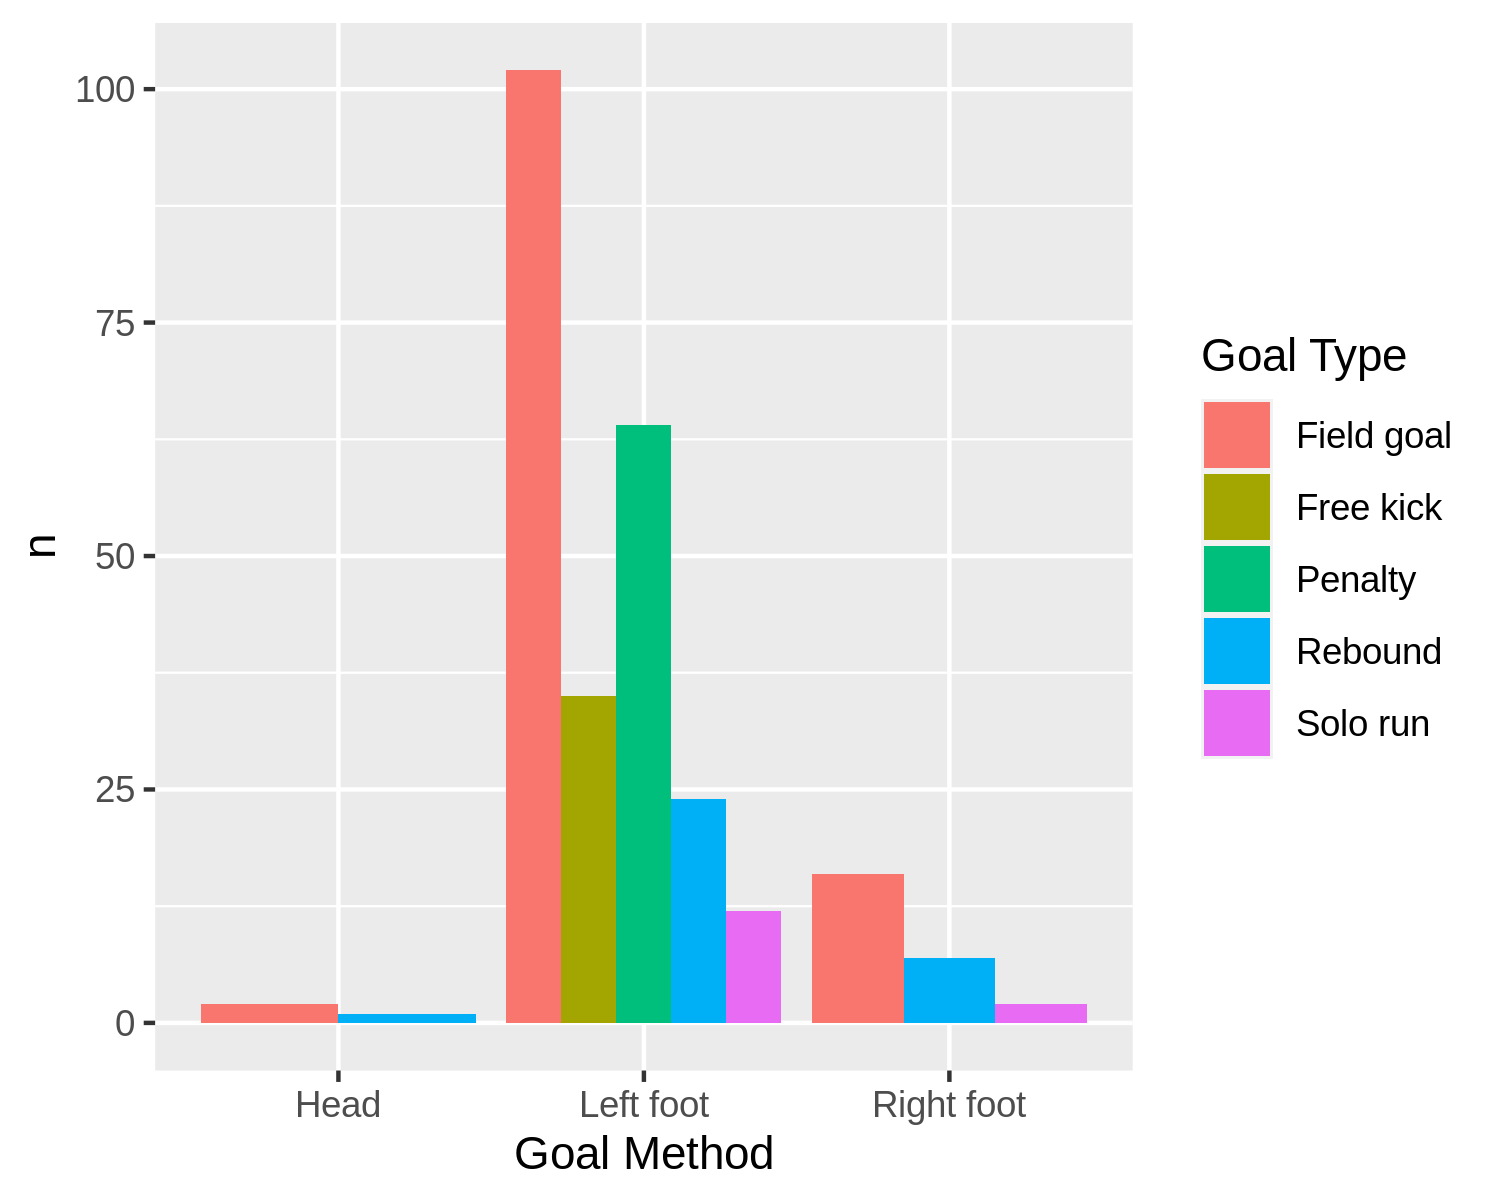

In [26]:
p = ggplot(df_summary, aes(x = `Goal Method`, y = `n`, fill = `Goal Type`))

p = p + geom_col(position = "dodge")

p

Home team,Final Game Result,n
<chr>,<chr>,<int>
AC Milan,Won,1
NA,Won,3
Argentina,Draw,1
Argentina,Won,5
Arsenal,Won,2
Athletic de Bilbao,Draw,2
Athletic de Bilbao,Won,2
NA,Won,3
Bayer Leverkusen,Draw,1


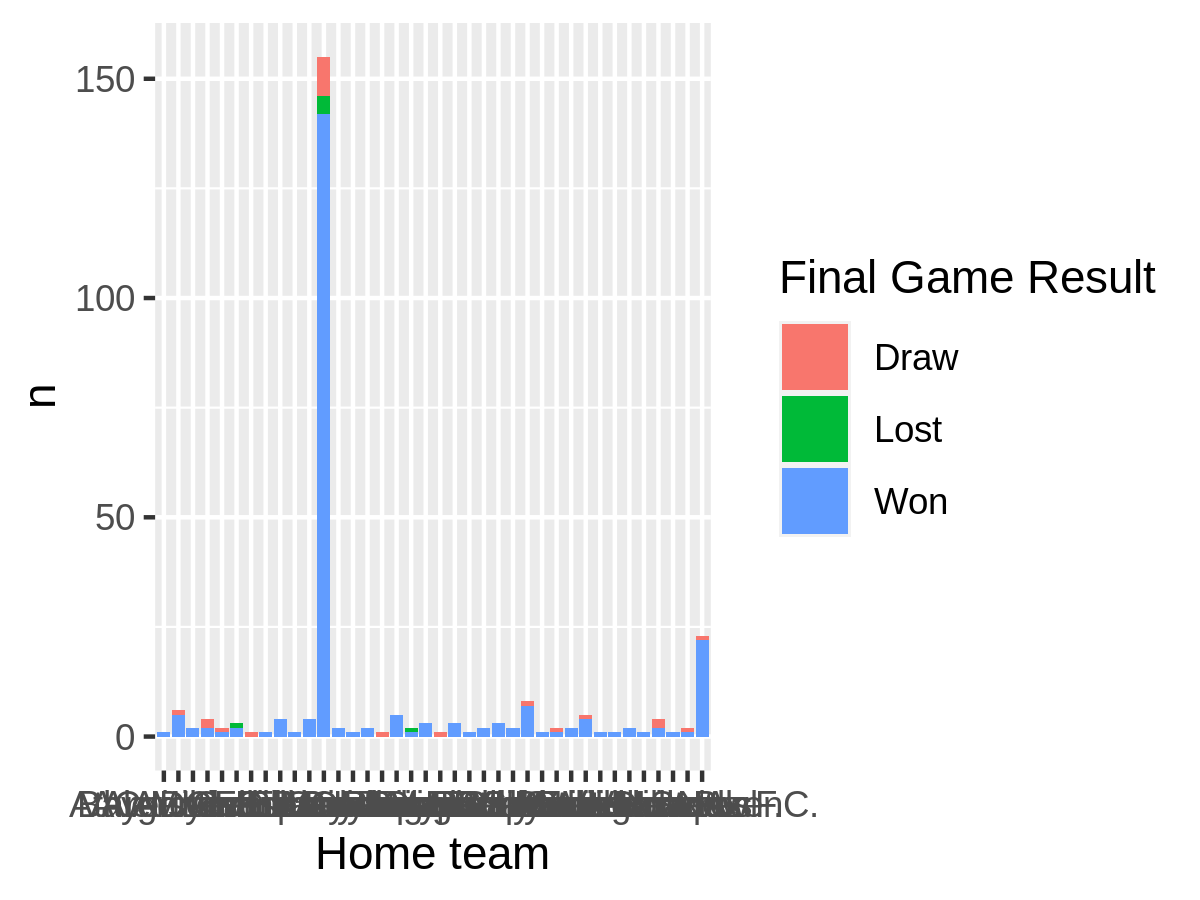

In [43]:
home_team_outcome_summary=football %>%
drop_na() %>%
group_by(`Home team`, `Final Game Result`) %>%
count() %>%
mutate(`Home team` = iconv(`Home team`, to = 'UTF-8'))# calculate the name count for each group

home_team_outcome_summary
##bar chart
options(repr.plot.width=4, repr.plot.height=3, repr.plot.res = 300)
p = ggplot(home_team_outcome_summary, aes(x = `Home team`, y = `n`, fill = `Final Game Result`))

p = p + geom_col()

p

Away team,Final Game Result,n
<chr>,<chr>,<int>
AC Milan,Won,3
AS Roma,Won,2
Ajax,Won,1
NA,Won,4
Argentina,Won,4
Arsenal,Won,4
Athletic de Bilbao,Won,7
NA,Won,4
Bayer Leverkusen,Won,1


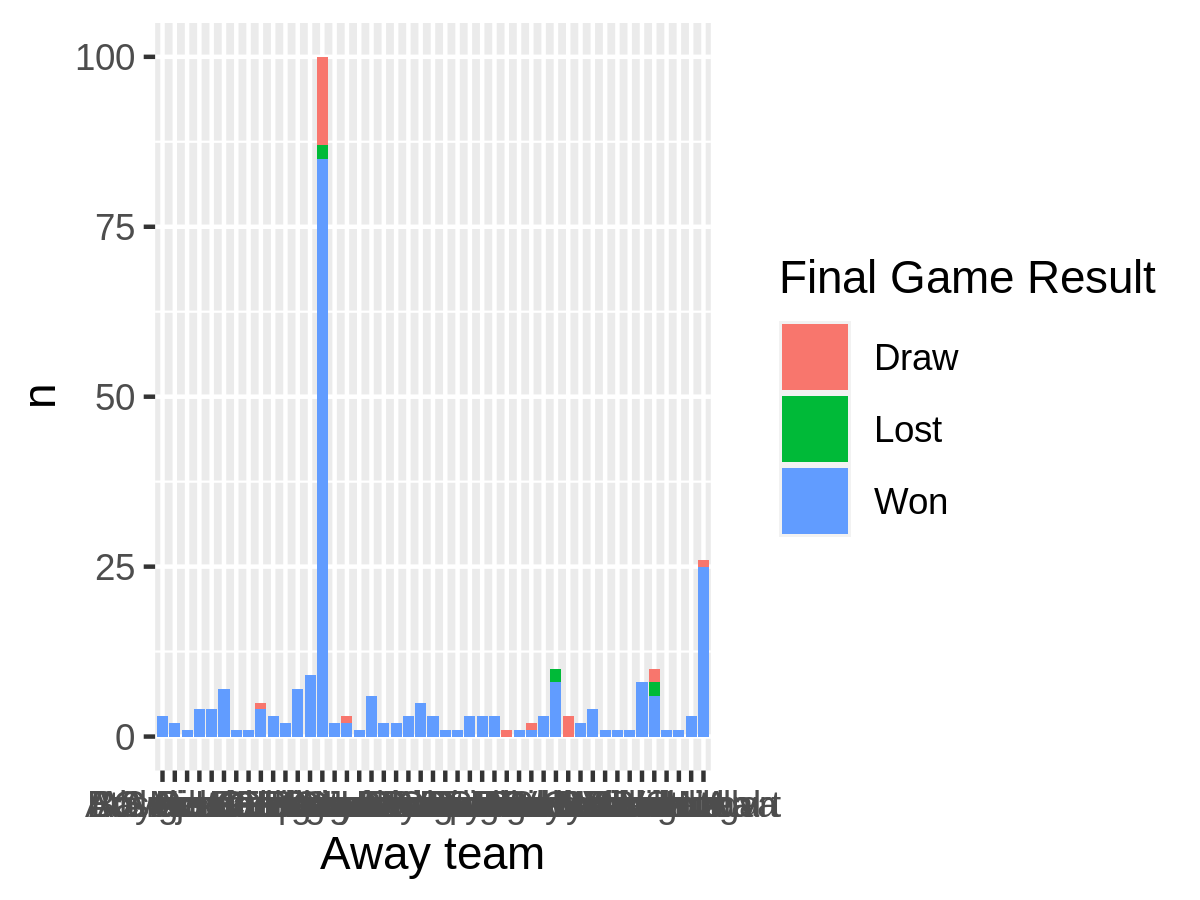

In [44]:
away_team_outcome_summary=football %>%
drop_na() %>%
group_by(`Away team`, `Final Game Result`) %>%
count()  %>%
mutate(`Away team` = iconv(`Away team`, to = 'UTF-8'))# calculate the name count for each group

away_team_outcome_summary

##bar chart
options(repr.plot.width=4, repr.plot.height=3, repr.plot.res = 300)
p = ggplot(away_team_outcome_summary, aes(x = `Away team`, y = `n`, fill = `Final Game Result`))

p = p + geom_col()

p

In [36]:
##options(repr.plot.width=4, repr.plot.height=3, repr.plot.res = 300)
p = ggplot(home_team_outcome_summary, aes(x = `Home team`, y = `n`, fill = `Final Game Result`))

p = p + geom_col()

p

ERROR while rich displaying an object: Error in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, : invalid string in PangoCairo_Text

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. 